In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

from env import Arm1DEnv

In [2]:
# 行動を選択(ε-greedy法を使用)
def choice_action(q_table, state, ipsilon=0.2)->int:
    # 探索
    if np.random.rand() < ipsilon:
        return np.random.choice(2)

    # 活用
    else:
        return np.argmax(q_table[state])
    
# 今の状態と取った行動により、Q-tableを更新
def update_q(q_table, now_state, action, next_state, reward, gamma=0.9, lr=0.05):
    best_q = np.max(q_table[next_state])
    # 報酬値 + 割引率 x 次の状態での最大価値
    td_target = reward + gamma * best_q
    q_table[now_state, action] += lr * (td_target - q_table[now_state, action])
    return q_table

In [3]:
# 環境の実体化
arm_env = Arm1DEnv()

# Qテーブルの初期化
q_table = np.zeros((arm_env.n_state, arm_env.action_space), np.float32)

# ハイパパラメータの設定
# 学習エピソード
episode = 10_000
# 最大ステップ数
max_step = 50
# 割引率
gamma = 0.9
# 探索率
init_ipsilon = 0.15 
# 学習率
lr = 0.01 

# log記録用
reward_log = []
finish_count = 0

for i in range(episode):
    total_reward = 0
    ipsilon = max(0.01, init_ipsilon * (0.999 ** i))
    for _ in range(max_step):
        now_state = arm_env.index_state

        # 行動の決定
        action = choice_action(
            q_table=q_table,
            state=now_state,
            ipsilon=ipsilon
        )

        # 行動->報酬・状態を取得
        next_state, reward, is_finish = arm_env.step(action)
        total_reward += reward

        # q-tableの更新
        q_table = update_q(
                        q_table=q_table,
                        now_state=now_state,
                        action=action,
                        next_state=next_state,
                        reward=reward,
                        gamma=gamma,
                        lr=lr
                        )

        # ゴールしたらエピソード終了
        if is_finish:
            # print(arm_env.state, arm_env.start)
            finish_count+=1
            arm_env.reset()
            break

    reward_log.append(total_reward)

In [4]:
finish_count

7666

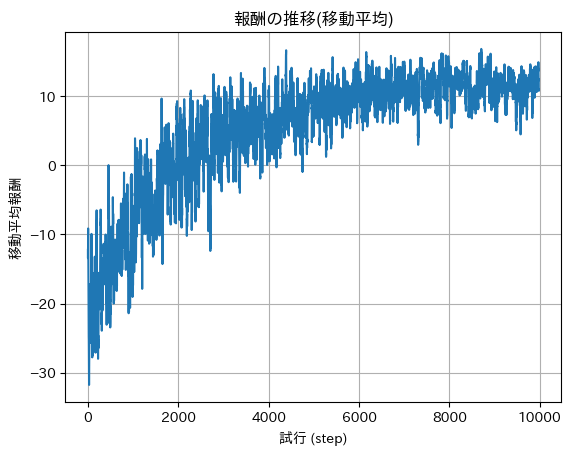

In [5]:
window = 20
moving_avg = np.convolve(reward_log, np.ones(window)/window, mode='valid')

plt.plot(moving_avg)
plt.xlabel("試行 (step)")
plt.ylabel('移動平均報酬')
plt.title("報酬の推移(移動平均)")
plt.grid()
plt.show()

In [6]:
list = np.arange(-360, 360, 5)

diff = (list + 180) % 360 - 180  # [-180, 180] の範囲に変換
index = diff // 5 + 72 // 2

index

array([36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
       15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
       66, 67, 68, 69, 70, 71,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 34, 35])